In [1]:
# from pathlib import Path

# repository_path = Path('..').resolve()

# !pip install -Uqq {repository_path}
%pip install -e ..
    


# !export PYTHONPATH=$PYTHONPATH:{repository_path}
# !echo $PYTHONPATH

Obtaining file:///Users/luan/Developer/glider
  Installing build dependencies ... done
  Checking if build backend supports build_editable ... done
  Getting requirements to build editable ... done
  Preparing editable metadata (pyproject.toml) ... done
  Building editable for glider (pyproject.toml) ... done
  Created wheel for glider: filename=glider-0.0.0-0.editable-py3-none-any.whl size=1136 sha256=04594367afd6312a60b49b23842addf2bf469b3e83f6b7f06d2cfbc40ee8605b
  Stored in directory: /private/var/folders/c9/r_xhlt7x1s1dh7xsyh6t4sgr0000gn/T/pip-ephem-wheel-cache-5iaqlpfr/wheels/b3/65/77/965fc552ac1cb246c95128c79c3575880f5b929eb13fb00638
Successfully built glider
  Attempting uninstall: glider
    Found existing installation: glider 0.0.0
    Uninstalling glider-0.0.0:
      Successfully uninstalled glider-0.0.0

[notice] A new release of pip available: 22.3 -> 23.2.1
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.

<a target="_blank" href="https://colab.research.google.com/github/Luan-vP/glider/blob/main/walkthrough.ipynb">
  <img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/>
</a>

In [2]:
import glider.visualize as visualize
import glider.vehicle as vehicle

import mediapy as media

Hi there! Welcome to jelyfish_can_fly 

An aquarium of creatures learning to fly, or at least glide...



There are 3 different reproduction modes:
- Mutation
- Cloning
- Cross-over

The first mode, mutation, creates offspring that vary according to the MUTATION_RATIO, here 5%. 

Let's try it out!

""

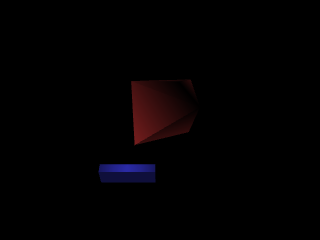

""

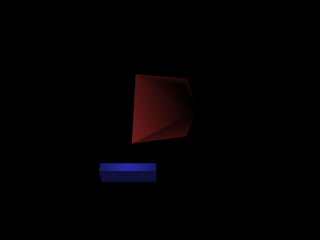

In [3]:
v = vehicle.Vehicle(
    num_vertices=10,
    max_dim_m=5,
    )
media.show_image(visualize.view_vehicle(*v.create_glider_from_vertices()))

v2 = vehicle.Vehicle(
    vertices=v.mutate(),
)
media.show_image(visualize.view_vehicle(*v2.create_glider_from_vertices()))

These will be similar to the parents, but not the same, allowing us to whittle into adjacent niches.

Cross-over allows us to take a set of genes from one parent, and a set of genes from the other, resulting in a hybrid.

The idea is to take existing "features" from both gliders and combine them to create new solution tips.

""

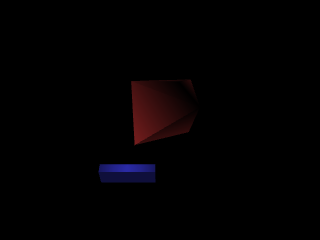

""

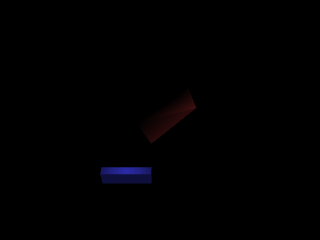

""

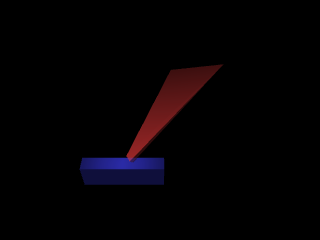

In [4]:
# Here is an example of cross-over reproduction:

v1 = vehicle.Vehicle(
    num_vertices=10,
    max_dim_m=0.5,
    )
media.show_image(visualize.view_vehicle(*v.create_glider_from_vertices()))

v2 = vehicle.Vehicle(
    num_vertices=10,
    max_dim_m=5.0,
)
media.show_image(visualize.view_vehicle(*v2.create_glider_from_vertices()))

v3 = vehicle.Vehicle(
    vertices=v2.cross_over(v1),
)
media.show_image(visualize.view_vehicle(*v3.create_glider_from_vertices()))

Iteration: 0
Fitness: 1.8983541652515574


""

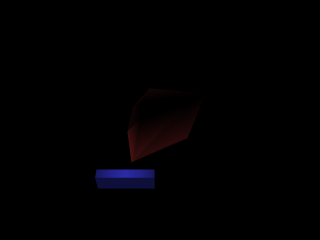

Iteration: 50
Fitness: 3.6211088607077735


""

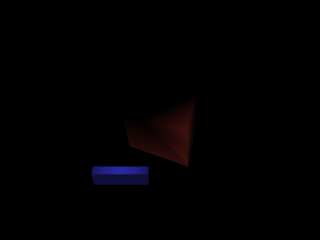

In [5]:
from glider.optimization import iterate_population, fitness_func

population = [] 
for i in range(200):
    population = iterate_population(
        population,
        population_size = 100,
        survival_weight = 0.4,
        # cloning_weight = 0.4,
    )

    if i % 50 == 0:
        print("Iteration:", i)
        winning_genes = population[0]
        print("Fitness:", fitness_func(winning_genes))
        vehicle.Vehicle(vertices=winning_genes).show()